In [1]:
import sys
import os
import numpy as np
import pandas as pd

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from utils import download_data
from mappings import value_mapping
# Now you can import the TimeSeriesDataset class
from TimeSeriesDataset import TimeSeriesDataset as TSD

In [2]:
# initialize dataset by downloading dataset or downloading the data from polity_url
dataset = TSD(categories=['sc'], template_path='../datasets/test.csv')
dataset.add_polities()

Loaded template from ../datasets/test.csv
Downloaded 839 rows


In [3]:
url = "https://seshatdata.com/api/crisisdb/power-transitions/"
pt_df = download_data(url)

Downloaded 3449 rows


In [4]:
PT_types = ['overturn', 'predecessor_assassination', 'intra_elite',
       'military_revolt', 'popular_uprising', 'separatist_rebellion',
       'external_invasion', 'external_interference']
for type in PT_types:
    pt_df[type] = pt_df[type].apply(lambda x: value_mapping[x] if x in value_mapping.keys() else np.nan)

# set nan values to 0
pt_df.fillna(0, inplace=True)

In [5]:
for idx, row in pt_df.iterrows():
    polity = row['polity_id']
    if polity not in dataset.raw.PolityID.unique():
        continue
    year = np.mean([row['year_from'], row['year_to']])
    dataset.add_years(polID=polity, year=year)

In [6]:
dataset.raw = dataset.raw.loc[(dataset.raw.Year.notna())&(dataset.raw.Year!=0)]

# delete duplicates
dataset.raw.drop_duplicates(subset=['PolityID', 'Year'], inplace=True)

dataset.raw = dataset.raw.sort_values(by=['PolityID', 'Year'])
dataset.raw.reset_index(drop=True, inplace=True)

In [7]:
dataset.download_all_categories()

Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end ye

In [20]:
print(len(dataset.debug.issue))

path = '/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/datasets/template_debug.csv'
template_debug = pd.read_csv(path)
len(template_debug.issue)

5599


10

In [24]:
len(dataset.debug.issue.unique())

153

In [9]:
# remove all rows that have less than 30% of the columns filled in
dataset.remove_incomplete_rows(nan_threshold=0.3)
# build the social complexity variables
dataset.build_social_complexity()
# impute the missing values
dataset.impute_missing_values()

In [10]:
dataset.impute_missing_values()

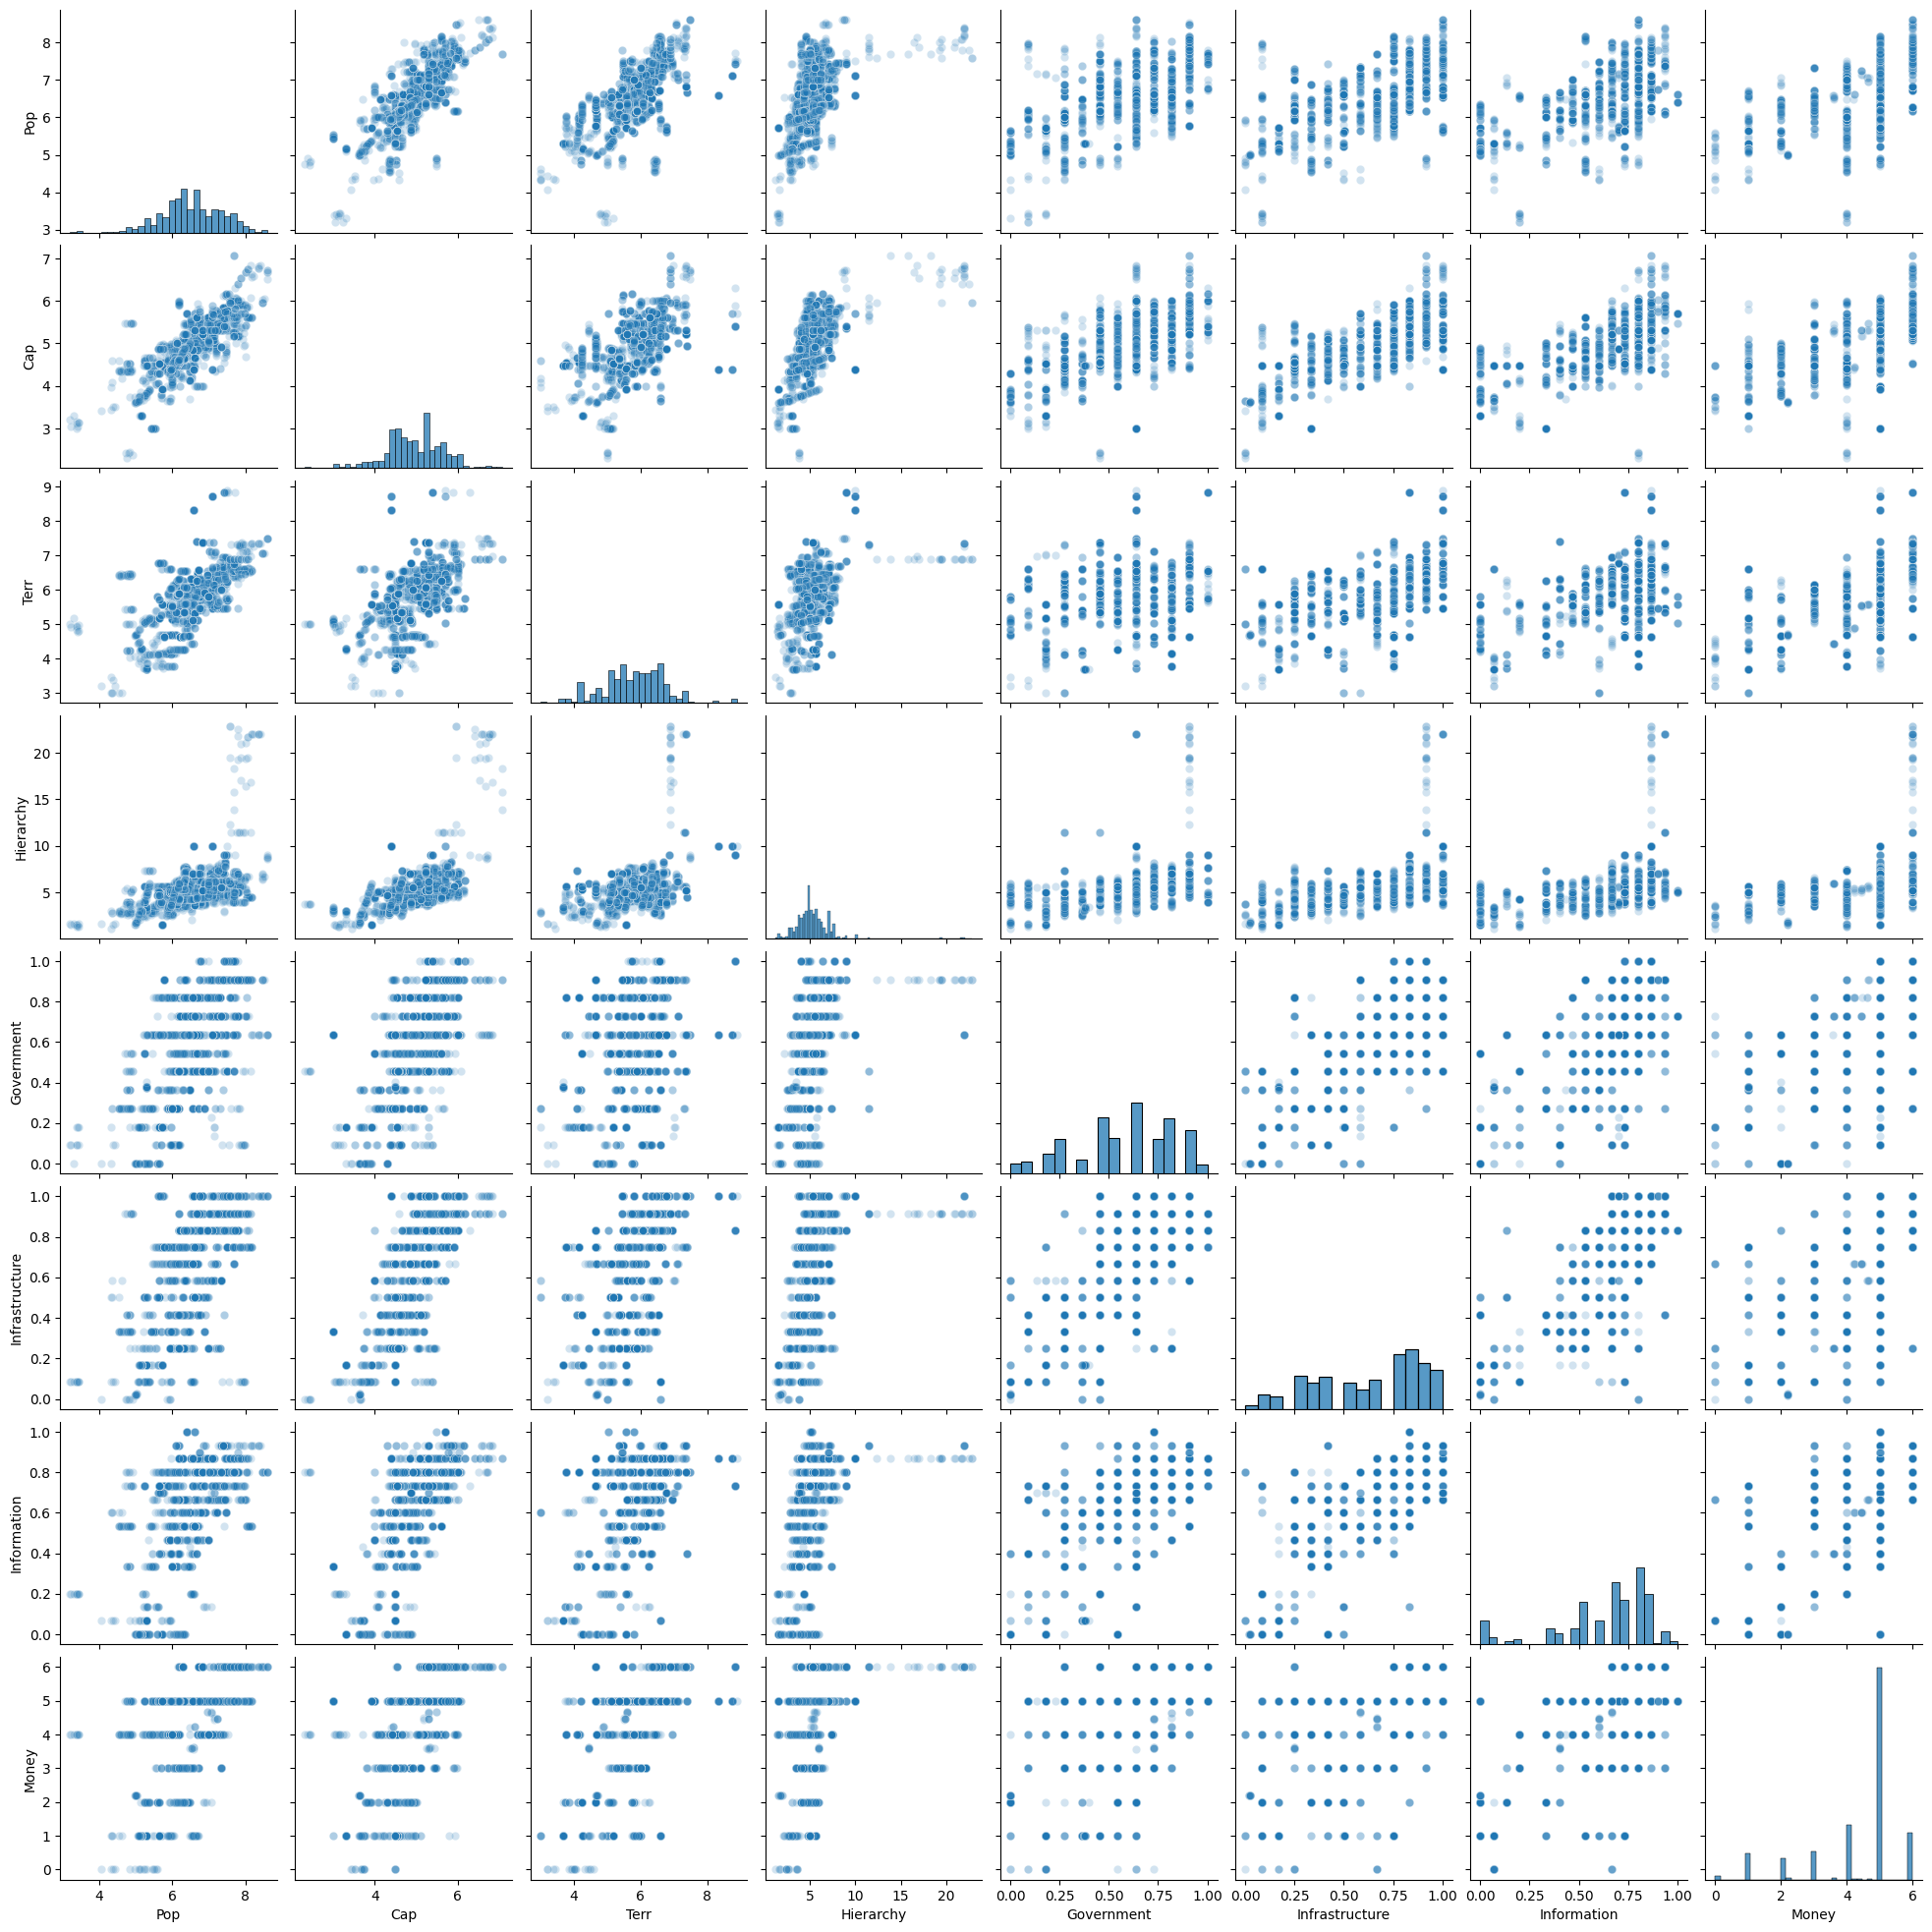

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sc_columns = ['Pop','Cap','Terr','Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money']
sns.pairplot(dataset.scv_imputed[sc_columns], plot_kws={'alpha': 0.2})
plt.show()

In [12]:
row = dataset.raw.loc[(dataset.raw.PolityName == 'us_united_states_of_america_reconstruction')&(dataset.raw.Year == 1900.)]
dataset.template.template.loc[dataset.template.template.PolityName == 'us_united_states_of_america_reconstruction']

,NGA,PolityID,PolityName,StartYear,EndYear,polity-territories,polity-populations,population-of-the-largest-settlements,settlement-hierarchies,administrative-levels,...,fictions,articles,tokens,precious-metals,foreign-coins,indigenous-coins,paper-currencies,couriers,postal-stations,general-postal-services
785,NaN,575,us_united_states_of_america_reconstruction,1866.0,1933.0,"{'t': [[1870, 1930]], 'value': [[(7838583, 783...","{'t': [[1870, 1880, 1890, 1900, 1910, 1920, 19...","{'t': [[1870, 1880, 1890, 1900, 1910, 1920, 19...",NaN,NaN,...,"{'t': [[1866.0, 1933.0]], 'value': [[(1, 1), (...","{'t': [[1866.0, 1933.0]], 'value': [[(0, 0), (...","{'t': [[1866.0, 1933.0]], 'value': [[(0, 0), (...","{'t': [[1866.0, 1933.0]], 'value': [[(1, 1), (...","{'t': [[1866.0, 1933.0]], 'value': [[(0, 0), (...","{'t': [[1866.0, 1933.0]], 'value': [[(1, 1), (...","{'t': [[1866.0, 1933.0]], 'value': [[(1, 1), (...",NaN,"{'t': [[1866.0, 1933.0]], 'value': [[(1, 1), (...","{'t': [[1866.0, 1933.0]], 'value': [[(1, 1), (..."


In [13]:
dataset.template.template.loc[dataset.template.template['PolityID']==575,'polity-populations'].values[0]

"{'t': [[1870, 1880, 1890, 1900, 1910, 1920, 1930]], 'value': [[(38558371, 38558371), (50155789, 50155789), (62622250, 62622250), (76803387, 76803387), (101146530, 101146530), (117823165, 117823165), (137008435, 137008435)]], 'polity_years': [1866.0, 1933.0]}"

In [14]:
t = dataset.template.template
for col in t.columns[5:]:
    c1 = t[col].apply(lambda x : len(eval(x)['value'])>1 if pd.notna(x) else False)
    c2 = t[col].apply(lambda x : len(eval(x)['value'][0])>3 if pd.notna(x) else False)

    if len(t[c1&c2])>0:
        print(col)
        print(len(t[c1&c2]))
        break

polity-populations
1


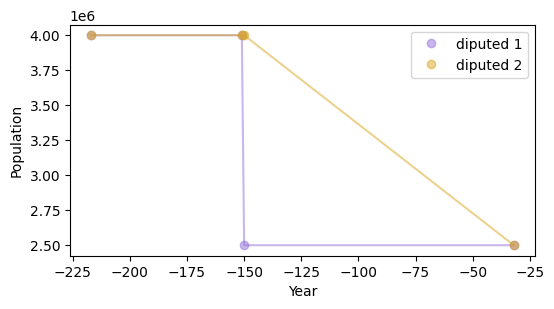

In [15]:
ts = np.array(eval(t.loc[c1&c2, col].values[0])['t'])
vs = np.array(eval(t.loc[c1&c2, col].values[0])['value'])
fig,ax = plt.subplots(figsize=(6,3))
plt.plot(ts[0], vs[0,:,0],'o', color = 'mediumpurple', alpha = 0.5, label = 'diputed 1')
plt.plot(ts[0], vs[0,:,0], color = 'mediumpurple', alpha = 0.5)
plt.plot(ts[1], vs[1,:,0],'o', color = 'goldenrod', alpha = 0.5, label = 'diputed 2')
plt.plot(ts[1], vs[1,:,0], color = 'goldenrod', alpha = 0.5)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

In [16]:
vs[0,:,0]

array([4000000, 4000000, 2500000, 2500000])